# Rayquaza model

In [1]:
import arviz as az
import pymc3 as pm

In [2]:
def make_rayquaza_model(n_shinies: int):
    with pm.Model() as model:
        p_shiny = pm.Beta(
            "p_shiny", 1, 2
        )
        number_of_shinies = pm.Binomial(
            "number_of_shinies",
            44,
            p_shiny,
            observed=n_shinies,
        )
        
    return model

def sample(model: pm.Model) -> az.InferenceData:
    with model:
        samples = pm.sample(draws=1000, tune=500, chains=4)
        idata = az.from_pymc3(samples)
        
    return idata

In [3]:
idata = sample(make_rayquaza_model(n_shinies=2))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 11 seconds.


array([[<AxesSubplot:title={'center':'p_shiny'}>,
        <AxesSubplot:title={'center':'p_shiny'}>]], dtype=object)

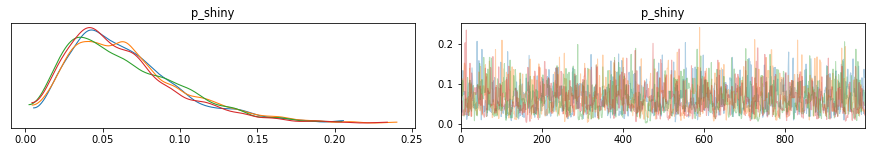

In [4]:
az.plot_trace(idata)

## 0 shinies in 44 attempts

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 10 seconds.
The acceptance probability does not match the target. It is 0.8815604213930192, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<AxesSubplot:title={'center':'p_shiny'}>,
        <AxesSubplot:title={'center':'p_shiny'}>]], dtype=object)

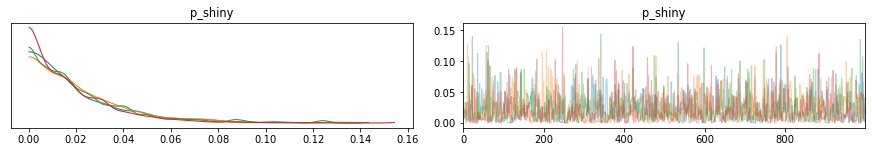

In [5]:
idata = sample(make_rayquaza_model(n_shinies=0))
az.plot_trace(idata)

## 4 shinies in 44 attempts

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 10 seconds.


array([[<AxesSubplot:title={'center':'p_shiny'}>,
        <AxesSubplot:title={'center':'p_shiny'}>]], dtype=object)

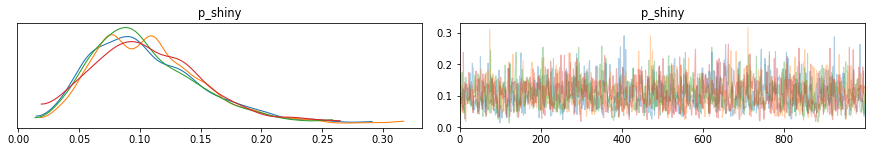

In [6]:
idata = sample(make_rayquaza_model(n_shinies=4))
az.plot_trace(idata)

## Some prior plotting (this didn't make it into the video)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pal = sns.color_palette("Set2")

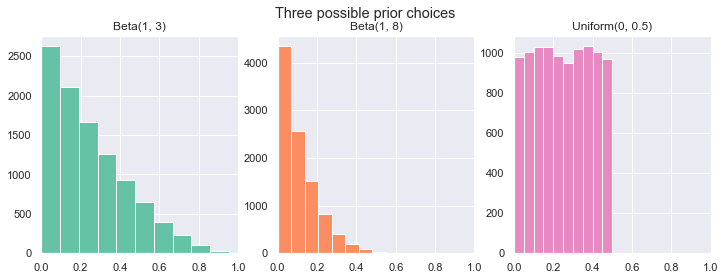

In [8]:
def make_prior_plots():
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].hist(
        pm.Beta.dist(1, 3).random(size=10_000), color=pal[0],
    )
    ax[1].hist(
        pm.Beta.dist(1, 8).random(size=10_000), color=pal[1],
    )
    ax[2].hist(
        pm.Uniform.dist(0, 0.5).random(size=10_000), color=pal[3],
    )
    for axis in ax:
        axis.set_xlim(0, 1)
        
    ax[0].set_title("Beta(1, 3)")
    ax[1].set_title("Beta(1, 8)")
    ax[2].set_title("Uniform(0, 0.5)")
    fig.suptitle("Three possible prior choices")
    
make_prior_plots()